In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
titanic= sns.load_dataset("titanic")

In [245]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [246]:
titanic.info()
titanic.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [247]:
titanic['age'] = titanic.groupby(['pclass','sex'])['age'].transform(lambda x: x.fillna(x.median()))
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace = True)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace = True)

In [248]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [249]:
titanic[['survived','pclass','sibsp','parch','adult_male','alone']] = titanic[['survived','pclass','sibsp','parch','adult_male','alone']].astype('object')

In [250]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    object  
 1   pclass       891 non-null    object  
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    object  
 5   parch        891 non-null    object  
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    object  
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    object  
dtypes: category(2), float64(2), object(11)
memory usage: 92.8+ KB


In [251]:
cont_variables = titanic.select_dtypes(['float64','int64'])
cont_variables

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,21.5,23.4500
889,26.0,30.0000


In [252]:
cat_variables = titanic.select_dtypes(['object','category','bool'])
cat_variables

,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0,0,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1,0,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0,0,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,0,0,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,1,2,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,0,0,C,First,man,True,C,Cherbourg,yes,True


In [253]:
titanic.drop_duplicates(inplace=True, ignore_index=False)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,21.5,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


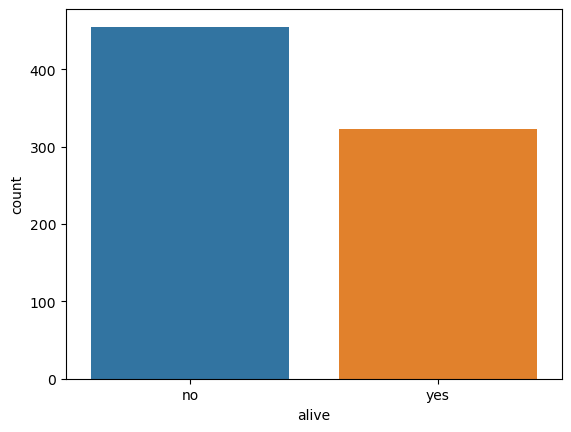

In [254]:
sns.countplot('alive',data=titanic)
plt.show()

In [255]:
titanic.groupby(['sex', 'alive'])['alive'].count()

sex     alive
female  no        76
        yes      217
male    no       379
        yes      106
Name: alive, dtype: int64

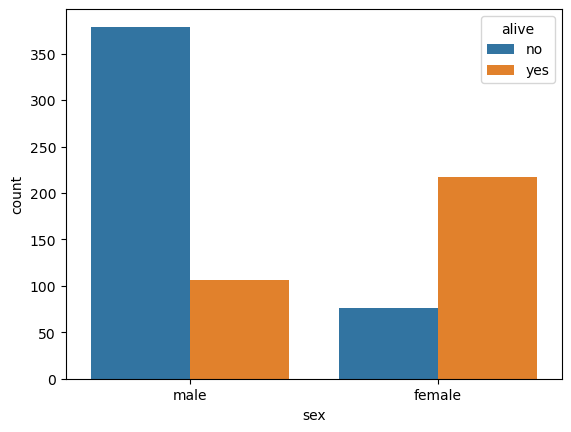

In [256]:
sns.countplot('sex',hue='alive',data=titanic)
plt.show()

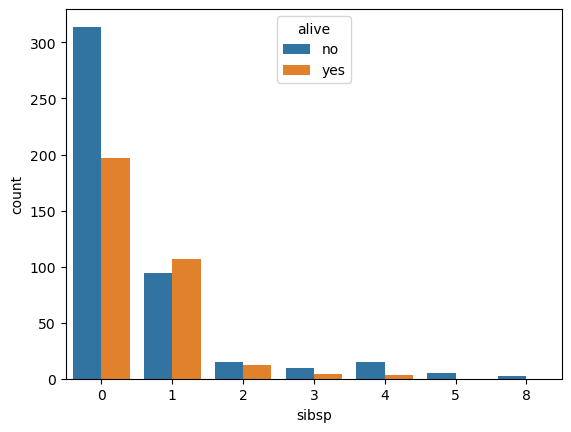

In [257]:
sns.countplot('sibsp',hue='alive',data=titanic)
plt.show()

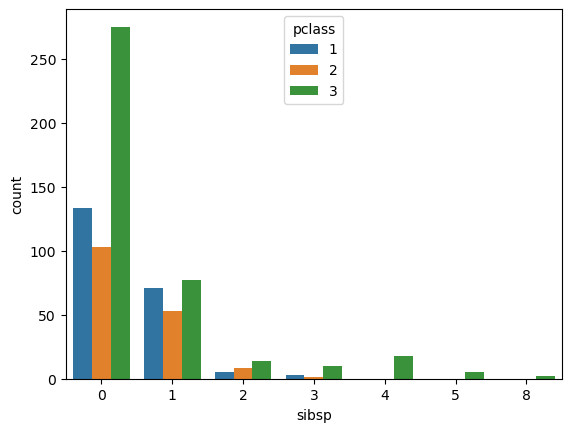

In [258]:
sns.countplot('sibsp',hue='pclass',data=titanic)
plt.show()


<AxesSubplot:xlabel='fare', ylabel='Count'>

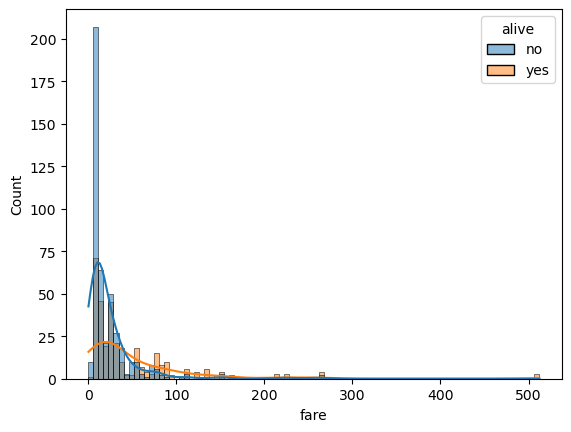

In [259]:
sns.histplot(x=titanic['fare'],hue=titanic['alive'],kde=True)

Text(0.5, 1.0, 'Sex & Age Vs alive')

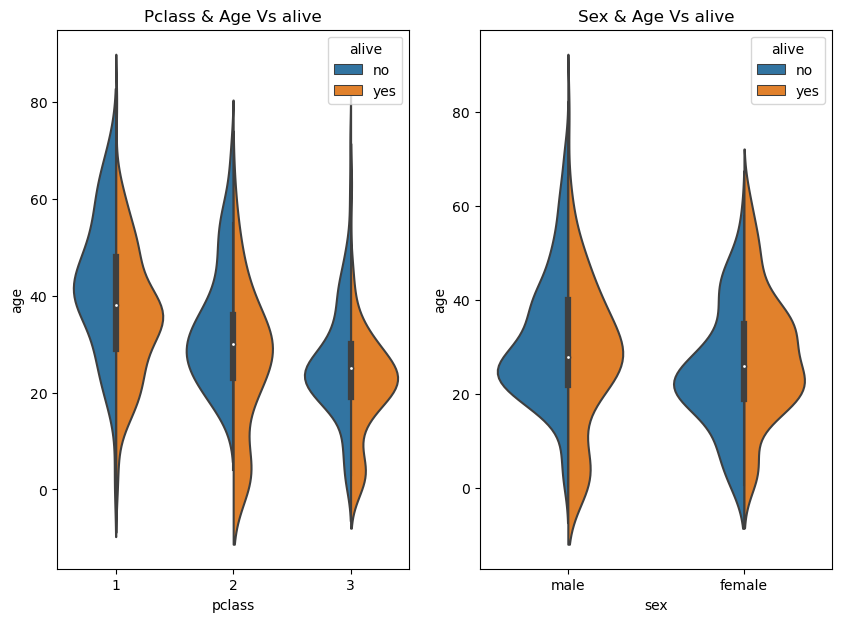

In [260]:
plt.figure(figsize = (10,7))
plt.subplot(1, 2, 1)
sns.violinplot('pclass','age',hue='alive',data=titanic,split=True)
plt.title("Pclass & Age Vs alive")
plt.subplot(1, 2, 2)
sns.violinplot('sex','age',hue='alive',data=titanic,split=True)
plt.title("Sex & Age Vs alive")

In [261]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [262]:
titanic.drop_duplicates(inplace=True)

In [263]:
titanic.drop(["parch","embarked","class","deck","alone"],axis=1,inplace=True)

In [264]:
titanic.head()

,survived,pclass,sex,age,sibsp,fare,who,adult_male,embark_town,alive
0,0,3,male,22.0,1,7.2500,man,True,Southampton,no
1,1,1,female,38.0,1,71.2833,woman,False,Cherbourg,yes
2,1,3,female,26.0,0,7.9250,woman,False,Southampton,yes
3,1,1,female,35.0,1,53.1000,woman,False,Southampton,yes
4,0,3,male,35.0,0,8.0500,man,True,Southampton,no


In [265]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     778 non-null    object 
 1   pclass       778 non-null    object 
 2   sex          778 non-null    object 
 3   age          778 non-null    float64
 4   sibsp        778 non-null    object 
 5   fare         778 non-null    float64
 6   who          778 non-null    object 
 7   adult_male   778 non-null    object 
 8   embark_town  778 non-null    object 
 9   alive        778 non-null    object 
dtypes: float64(2), object(8)
memory usage: 66.9+ KB


In [266]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'fare', 'who',
       'adult_male', 'embark_town', 'alive'],
      dtype='object')

In [267]:
x=titanic[["survived","pclass","sex","age","sibsp","fare","who","adult_male","embark_town"]]
y=titanic["alive"]

In [268]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.32)

In [269]:
xtrain_cont= xtrain.select_dtypes("float64")
xtest_cont= xtest.select_dtypes("float64")

xtrain_cat= xtrain.select_dtypes("object","category")
xtest_cat= xtest.select_dtypes("object","category")

# Transformation

In [270]:
from sklearn.preprocessing import PowerTransformer
power= PowerTransformer(method="yeo-johnson")

In [271]:
fconttrain = pd.DataFrame(power.fit_transform(xtrain_cont),
                columns = xtrain_cont.columns,
                index = xtrain_cont.index)

In [272]:
fconttest = pd.DataFrame(power.fit_transform(xtest_cont),
                columns = xtest_cont.columns,
                index = xtest_cont.index)

# Normalization

<AxesSubplot:>

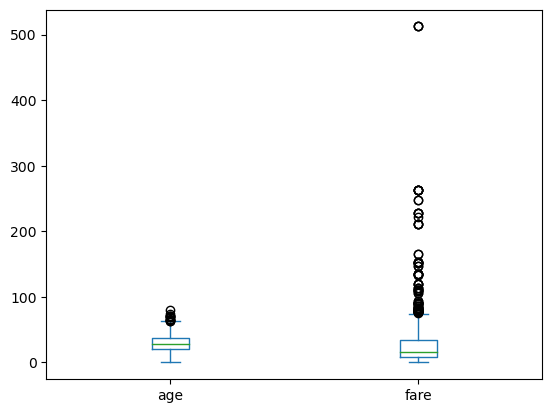

In [273]:
titanic.plot(kind= "box")

In [274]:
from sklearn.preprocessing import RobustScaler

In [275]:
rs= RobustScaler()

In [276]:
rs_fconttrain = pd.DataFrame(rs.fit_transform(fconttrain),
                columns = fconttrain.columns,
                index = fconttrain.index)

In [277]:
rs_fconttest = pd.DataFrame(rs.fit_transform(fconttest),
                columns = fconttest.columns,
                index = fconttest.index)

<AxesSubplot:ylabel='Count'>

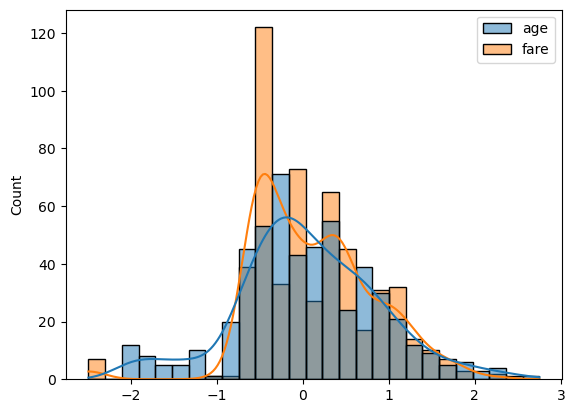

In [278]:
sns.histplot(rs_fconttrain,kde=True)

# Encoding for categorical columns

In [279]:
xtrain_cat

,survived,pclass,sex,sibsp,who,adult_male,embark_town
591,1,1,female,1,woman,False,Cherbourg
429,1,3,male,0,man,True,Southampton
81,1,3,male,0,man,True,Southampton
147,0,3,female,2,child,False,Southampton
273,0,1,male,0,man,True,Cherbourg
...,...,...,...,...,...,...,...
26,0,3,male,0,man,True,Cherbourg
496,1,1,female,1,woman,False,Cherbourg
880,1,2,female,0,woman,False,Southampton
234,0,2,male,0,man,True,Southampton


In [280]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse= False)

In [281]:
ohe_xtraincat = pd.DataFrame(ohe.fit_transform(xtrain_cat),
                columns= ohe.get_feature_names_out(xtrain_cat.columns),
                index= xtrain_cat.index)

In [282]:
ohe_xtestcat = pd.DataFrame(ohe.fit_transform(xtest_cat),
                columns= ohe.get_feature_names_out(xtest_cat.columns),
                index= xtest_cat.index)

# Data set -1 

In [283]:
final_train1 = pd.concat([rs_fconttrain,ohe_xtraincat],axis=1)
final_train1

,age,fare,survived_0,survived_1,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,...,sibsp_5,sibsp_8,who_child,who_man,who_woman,adult_male_False,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
591,1.354737,1.100051,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
429,0.241060,-0.491034,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
81,0.061004,-0.370885,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
147,-1.302730,0.547846,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
273,0.532368,0.446216,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,-0.186274,-0.569249,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
496,1.459647,1.100051,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
880,-0.186274,0.352900,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
234,-0.249538,-0.298199,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [295]:
final_test1 = pd.concat([rs_fconttest,ohe_xtestcat],axis=1)
final_test1

,age,fare,survived_0,survived_1,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,...,sibsp_5,sibsp_8,who_child,who_man,who_woman,adult_male_False,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
809,0.410406,0.617895,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
858,-0.121772,0.016910,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
276,1.069896,-0.582070,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
430,0.119622,0.215848,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
574,-0.635405,-0.556344,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,0.060068,-0.506784,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
282,-0.635405,-0.444664,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
667,-0.060605,-0.579887,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
875,-0.703318,-0.629674,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Data set - 2

In [297]:
final_train2 = pd.concat([xtrain_cont,ohe_xtraincat],axis=1)
final_train2

,age,fare,survived_0,survived_1,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,...,sibsp_5,sibsp_8,who_child,who_man,who_woman,adult_male_False,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
591,52.0,78.2667,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
429,32.0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
81,29.0,9.5000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
147,9.0,34.3750,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
273,37.0,29.7000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,25.0,7.2250,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
496,54.0,78.2667,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
880,25.0,26.0000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
234,24.0,10.5000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [298]:
final_test2 = pd.concat([xtest_cont,ohe_xtestcat],axis=1)
final_test2

,age,fare,survived_0,survived_1,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,...,sibsp_5,sibsp_8,who_child,who_man,who_woman,adult_male_False,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
809,33.0,53.1000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
858,24.0,19.2583,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
276,45.0,7.7500,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
430,28.0,26.5500,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
574,16.0,8.0500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,27.0,8.6625,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
282,16.0,9.5000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
667,25.0,7.7750,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
875,15.0,7.2250,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [287]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Decision tree for data set - 1

In [288]:
dtc= DecisionTreeClassifier()

In [289]:
dtc.fit(final_train1,ytrain)

DecisionTreeClassifier()

In [290]:
ytrainpred = dtc.predict(final_train1)
ytestpred = dtc.predict(final_test1)

In [291]:
accuracy_score(ytrain,ytrainpred),accuracy_score(ytest,ytestpred)

(1.0, 1.0)

In [292]:
confusion_matrix(ytrain,ytrainpred),confusion_matrix(ytest,ytestpred)

(array([[313,   0],
        [  0, 216]], dtype=int64),
 array([[142,   0],
        [  0, 107]], dtype=int64))

# Decision tree for data set - 2

In [299]:
dtc.fit(final_train2,ytrain)

DecisionTreeClassifier()

In [300]:
ytrainpred2= dtc.predict(final_train2)
ytestpred2= dtc.predict(final_test2)

In [302]:
accuracy_score(ytrain,ytrainpred2),accuracy_score(ytest,ytestpred2)

(1.0, 1.0)

In [303]:
confusion_matrix(ytrain,ytrainpred),confusion_matrix(ytest,ytestpred2)

(array([[313,   0],
        [  0, 216]], dtype=int64),
 array([[142,   0],
        [  0, 107]], dtype=int64))

# Logistic regression for data set - 1

In [304]:
lr= LogisticRegression()

In [305]:
lr.fit(final_train1,ytrain)

LogisticRegression()

In [306]:
Ytrainpred= lr.predict(final_train1)
Ytestpred= lr.predict(final_test1)

In [307]:
accuracy_score(ytrain,Ytrainpred),accuracy_score(ytest,Ytestpred)

(1.0, 1.0)

In [309]:
confusion_matrix(ytrain,Ytrainpred),confusion_matrix(ytest,Ytestpred)

(array([[313,   0],
        [  0, 216]], dtype=int64),
 array([[142,   0],
        [  0, 107]], dtype=int64))

# Logistic regression for data set - 2

In [310]:
lr.fit(final_train2,ytrain)

LogisticRegression()

In [314]:
Ytrainpred2= lr.predict(final_train2)
Ytestpred2= lr.predict(final_test2)

In [315]:
accuracy_score(ytrain,Ytrainpred2),accuracy_score(ytest,Ytestpred)

(1.0, 1.0)

In [317]:
confusion_matrix(ytrain,Ytrainpred2),confusion_matrix(ytest,Ytestpred2)

(array([[313,   0],
        [  0, 216]], dtype=int64),
 array([[142,   0],
        [  0, 107]], dtype=int64))